# Import dependencies

In [1]:
import pandas as pd      # Data Analysis
import numpy as np       # Mathematical Calculations
import matplotlib.pyplot as plt     # Plotting and Graphs and Charts
import seaborn as sns             # Advanced plotting (Charts in 1 line of code)
from sklearn.model_selection import train_test_split  #For spliting the data in train set and test set(ML Modeling)
from sklearn.linear_model import LogisticRegression   #Algorithm for ML model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report   #Evaluation metrics
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Exploratory Data Analysis

In [2]:
#Setting option to show max rows and max columns
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows", None)

In [3]:
df=pd.read_excel('customer_retention_dataset.xlsx')
df.head()

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,11 What browser do you run on your device to access the website?\t\t\t,12 Which channel did you follow to arrive at your favorite online store for the first time?,"13 After first visit, how do you reach the online retail store?\t\t\t\t",14 How much time do you explore the e- retail store before making a purchase decision?,15 What is your preferred payment Option?\t\t\t\t\t,16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t,"17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t\t",18 The content on the website must be easy to read and understand,19 Information on similar product to the one highlighted is important for product comparison,20 Complete information on listed seller and product being offered is important for purchase decision.,21 All relevant information on listed products must be stated clearly,22 Ease of navigation in website,23 Loading and processing speed,24 User friendly Interface of the website,25 Convenient Payment methods,26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time,27 Empathy (readiness to assist with queries) towards the customers,28 Being able to guarantee the privacy of the customer,"29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)",30 Online shopping gives monetary benefit and discounts,31 Enjoyment is derived from shopping online,32 Shopping online is convenient and flexible,33 Return and replacement policy of the e-tailer is important for purchase decision,34 Gaining access to loyalty programs is a benefit of shopping online,35 Displaying quality Information on the website improves satisfaction of customers,36 User derive satisfaction while shopping on a good quality website or application,37 Net Benefit derived from shopping online can lead to users satisfaction,38 User satisfaction cannot exist without trust,39 Offering a wide variety of listed product in several category,40 Provision of complete and relevant product information,41 Monetary savings,42 The Convenience of patronizing the online retailer,43 Shopping on the website gives you the sense of adventure,44 Shopping on your preferred e-tailer enhances your social status,45 You feel gratification shopping on your favorite e-tailer,46 Shopping on the website helps you fulfill certain roles,47 Getting value for money spent,"From the following, tick any (or all) of the online retailers you have shopped from;",Easy to use website or application,Visual appealing web-page layout,Wild variety of product on offer,"Complete, relevant description information of products",Fast loading website speed of website and application,Reliability of the website or application,Quickness to complete purchase,Availability of several payment options,Speedy order delivery,Privacy of customers’ information,Security of customer financial information,Perceived Trustworthiness,Presence of online assistance through multi-channel,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 71 columns):
 #   Column                                                                                                                                                                                                          Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                          --------------  ----- 
 0   1Gender of respondent                                                                                                                                                                                           269 non-null    object
 1   2 How old are you?                                                                                                                                                                    

All data is categorical data with 'object' data type.

In [5]:
df.nunique()

1Gender of respondent                                                                                                                                                                                                   2
2 How old are you?                                                                                                                                                                                                      5
3 Which city do you shop online from?                                                                                                                                                                                  11
4 What is the Pin Code of where you shop online from?                                                                                                                                                                  39
5 Since How Long You are Shopping Online ?                                                                                      

Checking for null values

In [6]:
df.isnull().any().sum()

0

We have no null values in our data.

# Data Cleaning

In [7]:
#Correction in columns 
from string import digits

#Removing tab spaces
df.columns = df.columns.str.replace('\t','')

df.columns = df.columns.str.replace(';','')
#Removing digits
remove_digits = str.maketrans('', '', digits)
df.columns = df.columns.str.translate(remove_digits)

#Removing leading and trailling spaces
df.columns = df.columns.str.strip()

In [8]:
df.head()

,Gender of respondent,How old are you?,Which city do you shop online from?,What is the Pin Code of where you shop online from?,Since How Long You are Shopping Online ?,How many times you have made an online purchase in the past year?,How do you access the internet while shopping on-line?,Which device do you use to access the online shopping?,What is the screen size of your mobile device?,What is the operating system (OS) of your device?,What browser do you run on your device to access the website?,Which channel did you follow to arrive at your favorite online store for the first time?,"After first visit, how do you reach the online retail store?",How much time do you explore the e- retail store before making a purchase decision?,What is your preferred payment Option?,How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?,"Why did you abandon the “Bag”, “Shopping Cart”?",The content on the website must be easy to read and understand,Information on similar product to the one highlighted is important for product comparison,Complete information on listed seller and product being offered is important for purchase decision.,All relevant information on listed products must be stated clearly,Ease of navigation in website,Loading and processing speed,User friendly Interface of the website,Convenient Payment methods,Trust that the online retail store will fulfill its part of the transaction at the stipulated time,Empathy (readiness to assist with queries) towards the customers,Being able to guarantee the privacy of the customer,"Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)",Online shopping gives monetary benefit and discounts,Enjoyment is derived from shopping online,Shopping online is convenient and flexible,Return and replacement policy of the e-tailer is important for purchase decision,Gaining access to loyalty programs is a benefit of shopping online,Displaying quality Information on the website improves satisfaction of customers,User derive satisfaction while shopping on a good quality website or application,Net Benefit derived from shopping online can lead to users satisfaction,User satisfaction cannot exist without trust,Offering a wide variety of listed product in several category,Provision of complete and relevant product information,Monetary savings,The Convenience of patronizing the online retailer,Shopping on the website gives you the sense of adventure,Shopping on your preferred e-tailer enhances your social status,You feel gratification shopping on your favorite e-tailer,Shopping on the website helps you fulfill certain roles,Getting value for money spent,"From the following, tick any (or all) of the online retailers you have shopped from",Easy to use website or application,Visual appealing web-page layout,Wild variety of product on offer,"Complete, relevant description information of products",Fast loading website speed of website and application,Reliability of the website or application,Quickness to complete purchase,Availability of several payment options,Speedy order delivery,Privacy of customers’ information,Security of customer financial information,Perceived Trustworthiness,Presence of online assistance through multi-channel,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,Male,31-40 years,Delhi,110009,Above 4 years,31-40 times,Dial-up,Desktop,Others,Window/windows Mobile,Google chrome,Search Engine,Search Engine,6-10 mins,"E-wallets (Pa

In [9]:
#Looking for ambiguity in data
for i in df:
    print(i,'\n', df[i].unique())
    print('\n')

Gender of respondent 
 ['Male' 'Female']


How old are you? 
 ['31-40 years' '21-30 years' '41-50 yaers' 'Less than 20 years'
 '51 years and above']


Which city do you shop online from? 
 ['Delhi' 'Greater Noida' 'Karnal ' 'Bangalore ' 'Noida' 'Solan'
 'Moradabad' 'Gurgaon ' 'Merrut' 'Ghaziabad' 'Bulandshahr']


What is the Pin Code of where you shop online from? 
 [110009 110030 201308 132001 530068 110011 110018 173229 110039 244001
 122018 201310 560037 203207 250001 201005 110044 201306 560010 201305
 110042 132036 560018 110008 560002 201303 201312 203202 560001 201304
 560003 110014 560013 173212 122009 201009 201008 201001 203001]


Since How Long You are Shopping Online ? 
 ['Above 4 years' '3-4 years' '2-3 years' 'Less than 1 year' '1-2 years']


How many times you have made an online purchase in the past  year? 
 ['31-40 times' '41 times and above' 'Less than 10 times' '11-20 times'
 '21-30 times' '42 times and above']


How do you access the internet while shopping on-line?

In [10]:
#Resolving ambiguity of column 
#Changing 42 times and above to 41 times and above as there are two unique seperate value for both
df['How many times you have made an online purchase in the past  year?'].replace('42 times and above','41 times and above',
                                                                                 inplace=True)


#Changing Mobile internet to Mobile Internet as there are two unique seperate value for both
df['How do you access the internet while shopping on-line?'].replace('Mobile internet','Mobile Internet',
                                                                                 inplace=True)

#Changing Greater noida to noida as there are two unique seperate value for both
df['Which city do you shop online from?'].replace({'Greater Noida':'Noida'},inplace=True)



# Data Segmentation

We can devide the data in four segment 
1- Columns 1 to 17 contain personal info or personal question
2- Columns 18 to 47 are feedback questions or suggestions
3- Columns 49 to 61 are good attributes of shoping website
4- Columns 62 to 70 are bad attributes of shoping website

In [11]:
#Columns 1 to 17 are personal info or personal question, so we will make different 
#dataset for these columns
personal=df.iloc[:,0:17]

#Columns 18 to 47 are feedback questions or suggestions, so we will make different 
#dataset for these columns
feedbacks=df.iloc[:,17:47]

#Online retailor people have shopped from
retailor_shopped=df.iloc[:,48]

#Columns 49 to 61 are good attributes of website, so we will make different 
#dataset for these columns
good_attribute=df.iloc[:,48:61]


#Columns 62 to 70 are bad attributes of website, so we will make different 
#dataset for these columns
bad_attribute=df.iloc[:,61:70]


In [12]:
personal.head()


,Gender of respondent,How old are you?,Which city do you shop online from?,What is the Pin Code of where you shop online from?,Since How Long You are Shopping Online ?,How many times you have made an online purchase in the past year?,How do you access the internet while shopping on-line?,Which device do you use to access the online shopping?,What is the screen size of your mobile device?,What is the operating system (OS) of your device?,What browser do you run on your device to access the website?,Which channel did you follow to arrive at your favorite online store for the first time?,"After first visit, how do you reach the online retail store?",How much time do you explore the e- retail store before making a purchase decision?,What is your preferred payment Option?,How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?,"Why did you abandon the “Bag”, “Shopping Cart”?"
0,Male,31-40 years,Delhi,110009,Above 4 years,31-40 times,Dial-up,Desktop,Others,Window/windows Mobile,Google chrome,Search Engine,Search Engine,6-10 mins,"E-wallets (Paytm, Freecharge etc.)",Sometimes,Lack of trust
1,Female,21-30 years,Delhi,110030,Above 4 years,41 times and above,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,Google chrome,Search Engine,Via application,more than 15 mins,Credit/Debit cards,Very frequently,Promo code not applicable
2,Female,21-30 years,Noida,201308,3-4 years,41 times and above,Mobile Internet,Smartphone,5.5 inches,Android,Google chrome,Search Engine,Via application,11-15 mins,"E-wallets (Paytm, Freecharge etc.)",Sometimes,Promo code not applicable
3,Male,21-30 years,Karnal,132001,3-4 years,Less than 10 times,Mobile Internet,Smartphone,5.5 inches,IOS/Mac,Safari,Search Engine,Search Engine,6-10 mins,Credit/Debit cards,Never,Better alternative offer
4,Female,21-30 years,Bangalore,530068,2-3 years,11-20 times,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,Safari,Content Marketing,Via application,more than 15 mins,Credit/Debit cards,Frequently,Better alternative offer


In [13]:
feedbacks.head()

,The content on the website must be easy to read and understand,Information on similar product to the one highlighted is important for product comparison,Complete information on listed seller and product being offered is important for purchase decision.,All relevant information on listed products must be stated clearly,Ease of navigation in website,Loading and processing speed,User friendly Interface of the website,Convenient Payment methods,Trust that the online retail store will fulfill its part of the transaction at the stipulated time,Empathy (readiness to assist with queries) towards the customers,Being able to guarantee the privacy of the customer,"Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)",Online shopping gives monetary benefit and discounts,Enjoyment is derived from shopping online,Shopping online is convenient and flexible,Return and replacement policy of the e-tailer is important for purchase decision,Gaining access to loyalty programs is a benefit of shopping online,Displaying quality Information on the website improves satisfaction of customers,User derive satisfaction while shopping on a good quality website or application,Net Benefit derived from shopping online can lead to users satisfaction,User satisfaction cannot exist without trust,Offering a wide variety of listed product in several category,Provision of complete and relevant product information,Monetary savings,The Convenience of patronizing the online retailer,Shopping on the website gives you the sense of adventure,Shopping on your preferred e-tailer enhances your social status,You feel gratification shopping on your favorite e-tailer,Shopping on the website helps you fulfill certain roles,Getting value for money spent
0,Agree (4),Indifferent (3),Indifferent (3),Agree (4),Agree (4),Strongly disagree (1),Dis-agree (2),Dis-agree (2),Disagree (2),Strongly agree (5),Agree (4),Agree (4),indifferent (3),Strongly disagree (1),Dis-agree (2),Dis-agree (2),Agree (4),indifferent (3),Strongly agree (5),Agree (4),Strongly agree (5),indifferent (3),indifferent (3),Disagree (2),indifferent (3),Agree (4),Agree (4),Strongly agree (5),Agree (4),Strongly agree (5)
1,Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),indifferent (3),indifferent (3),indifferent (3),Strongly agree (5),Strongly agree (5),Strongly agree (5)
2,Strongly agree (5),Agree (4),Agree (4),Agree (4),Agree (4),Agree (4),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Agree (4),Strongly agree (5),Strongly agree (5),Strongly agree (5),Agree (4),Agree (4),Agree (4),indifferent (3),indifferent (3),Agree (4)
3,Agree (4),Agree (4),Indifferent (3),Agree (4),Strongly agree (5),Agree (4),Strongly agree (5),Strongly agree (5),Agree (4),Strongly agree (5),Strongly agree (5),Agree (4),Agree (4),indifferent (3),indifferent (3),Agree (4),indifferent (3),indifferent (3),Agree (4),indifferent (3),Agree (4),Agree (4),Agree (4),Strongly agree (5),Agree (4),Agree (4),Strongly agree (5),Agree (4),indifferent (3),Agree (4)
4,Strongly agree (5),Indifferent (3),Indifferent (3),Agree (4),Agree (4),Strongly agree (5),Strongly agree (5),Strongly agree (5),Agree (4),Strongly agree (5),Agree (4),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Dis-agree (2),Agree (4),Strongly agree (5),Strongly agree (5),Strongly a

In [14]:
good_attribute.head()

,Easy to use website or application,Visual appealing web-page layout,Wild variety of product on offer,"Complete, relevant description information of products",Fast loading website speed of website and application,Reliability of the website or application,Quickness to complete purchase,Availability of several payment options,Speedy order delivery,Privacy of customers’ information,Security of customer financial information,Perceived Trustworthiness,Presence of online assistance through multi-channel
0,Paytm.com,Flipkart.com,Flipkart.com,Snapdeal.com,Snapdeal.com,Paytm.com,Paytm.com,Patym.com,Amazon.in,Amazon.in,Amazon.in,Flipkart.com,Paytm.com
1,"Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com","Amazon.in, Myntra.com","Flipkart.com, Myntra.com","Amazon.in, Flipkart.com, Myntra.com","Amazon.in, Flipkart.com, Myntra.com",Myntra.com,"Amazon.com, Flipkart.com, Myntra.com","Amazon.in, Flipkart.com, Myntra.com","Amazon.in, Flipkart.com",Myntra.com,Myntra.com,Myntra.com,"Amazon.in, Flipkart.com, Myntra.com"
2,"Amazon.in, Paytm.com, Myntra.com","Amazon.in, Paytm.com, Myntra.com","Amazon.in, Myntra.com","Amazon.in, Paytm.com, Myntra.com","Amazon.in, Paytm.com","Amazon.in, Paytm.com, Myntra.com","Amazon.com, Paytm.com, Myntra.com","Patym.com, Myntra.com",Amazon.in,Amazon.in,"Amazon.in, Paytm.com, Myntra.com","Amazon.in, Myntra.com",Myntra.com
3,"Amazon.in, Flipkart.com, Paytm.com, Myntra.com...","Amazon.in, Flipkart.com, Paytm.com, Myntra.com...","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Snapdeal.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.com, Flipkart.com, Paytm.com","Amazon.in, Flipkart.com, Myntra.com","Amazon.in, Flipkart.com, Snapdeal.com","Amazon.in, Flipkart.com, Myntra.com","Amazon.in, Flipkart.com, Snapdeal.com","Amazon.in, Flipkart.com, Snapdeal.com","Amazon.in, Flipkart.com, Myntra.com, Snapdeal"
4,"Amazon.in, Flipkart.com, Paytm.com, Myntra.com...",Myntra.com,Myntra.com,"Amazon.in, Flipkart.com, Paytm.com, Myntra.com...",Amazon.in,"Amazon.in, Paytm.com, Myntra.com","Amazon.com, Flipkart.com, Paytm.com, Myntra.co...","Amazon.in, Flipkart.com, Patym.com, Myntra.com...",Amazon.in,"Amazon.in, Paytm.com",Paytm.com,"Amazon.in, Myntra.com","Amazon.in, Myntra.com"


In [15]:
bad_attribute.head()

,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before
0,Amazon.in,Amazon.in,Flipkart.com,Flipkart.com,Amazon.in,Paytm.com,Flipkart.com,Amazon.in,Amazon.in
1,"Amazon.in, Flipkart.com",Myntra.com,snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Myntra.com,"Amazon.in, Flipkart.com"
2,Myntra.com,Myntra.com,Myntra.com,Myntra.com,Amazon.in,Paytm.com,Paytm.com,Paytm.com,Amazon.in
3,Snapdeal.com,"Myntra.com, Snapdeal.com",Myntra.com,Paytm.com,Paytm.com,Paytm.com,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Paytm.com"
4,"Flipkart.com, Paytm.com",Paytm.com,Paytm.com,Paytm.com,Snapdeal.com,Paytm.com,Amazon.in,Snapdeal.com,Paytm.com


# Data Visualisation

# Visualisation For personal segment data

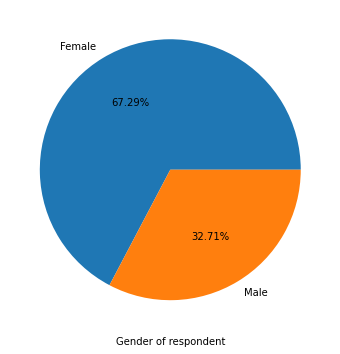

<Figure size 432x288 with 0 Axes>

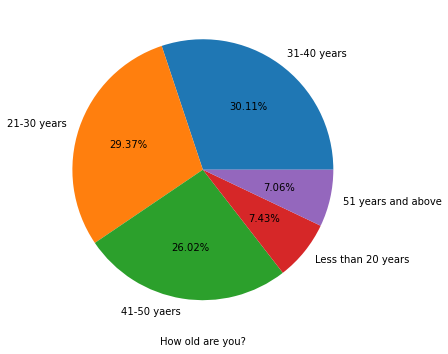

<Figure size 432x288 with 0 Axes>

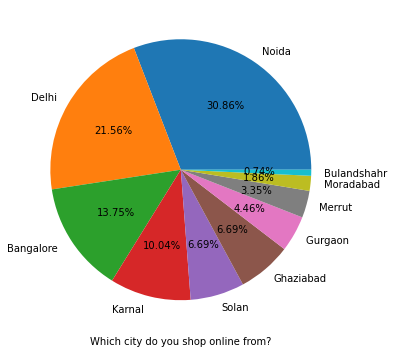

<Figure size 432x288 with 0 Axes>

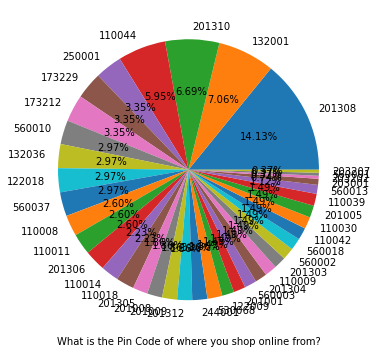

<Figure size 432x288 with 0 Axes>

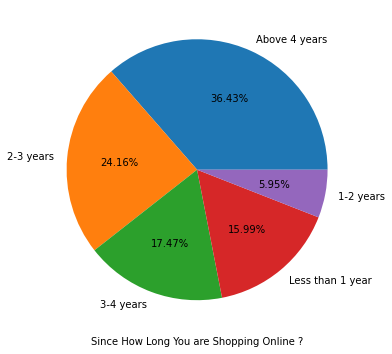

<Figure size 432x288 with 0 Axes>

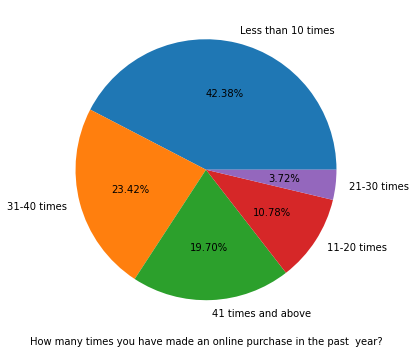

<Figure size 432x288 with 0 Axes>

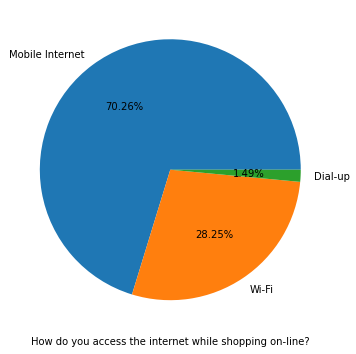

<Figure size 432x288 with 0 Axes>

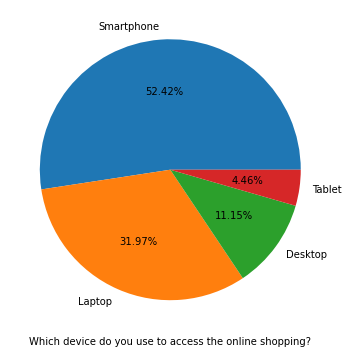

<Figure size 432x288 with 0 Axes>

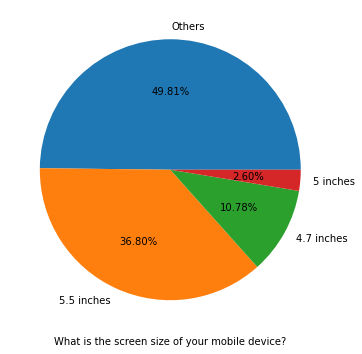

<Figure size 432x288 with 0 Axes>

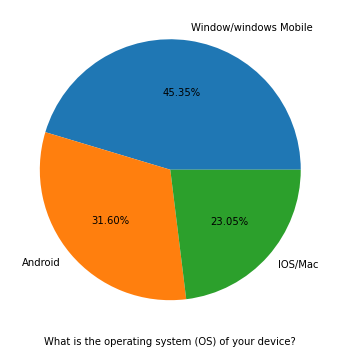

<Figure size 432x288 with 0 Axes>

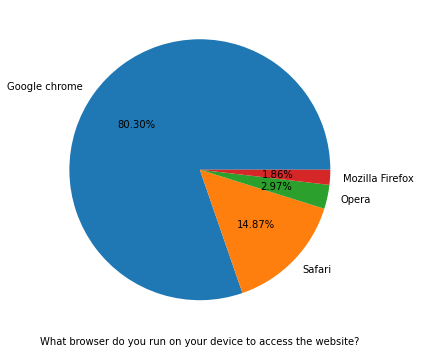

<Figure size 432x288 with 0 Axes>

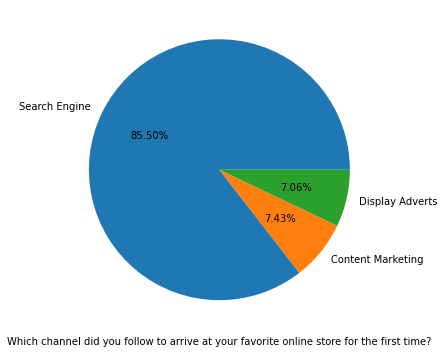

<Figure size 432x288 with 0 Axes>

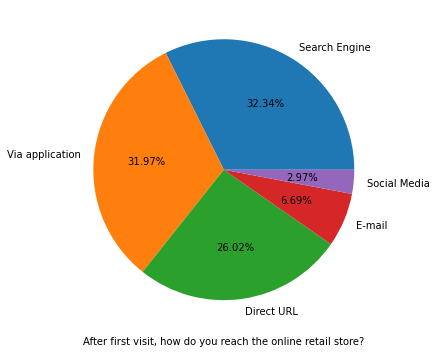

<Figure size 432x288 with 0 Axes>

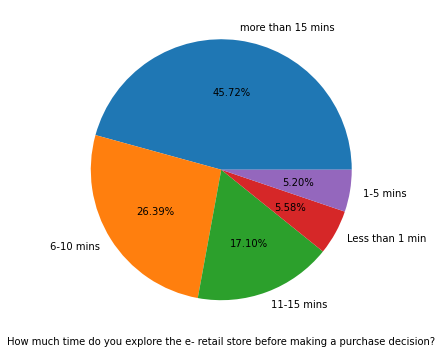

<Figure size 432x288 with 0 Axes>

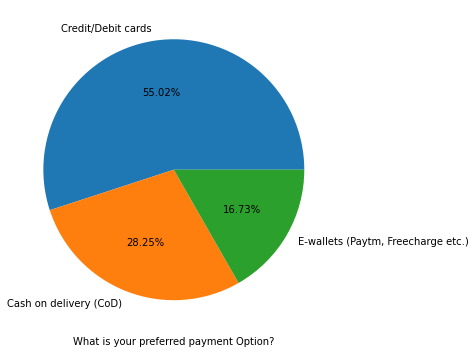

<Figure size 432x288 with 0 Axes>

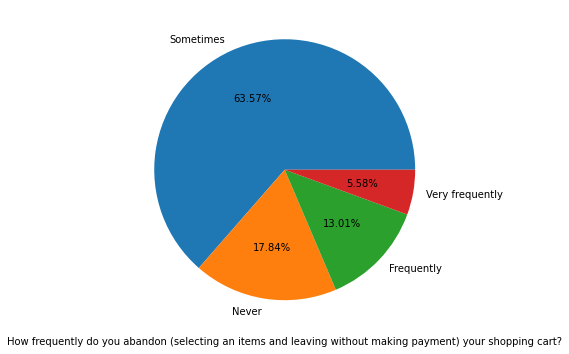

<Figure size 432x288 with 0 Axes>

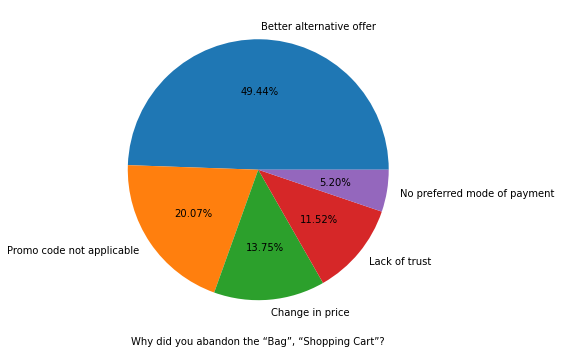

<Figure size 432x288 with 0 Axes>

In [16]:
for i in personal:
    plt.figure(figsize=(6,6))
    df[i].value_counts().plot.pie(autopct='%.2f%%')
    plt.xlabel(i)
    plt.ylabel('')
    plt.figure()

<AxesSubplot:xlabel='How old are you?', ylabel='count'>

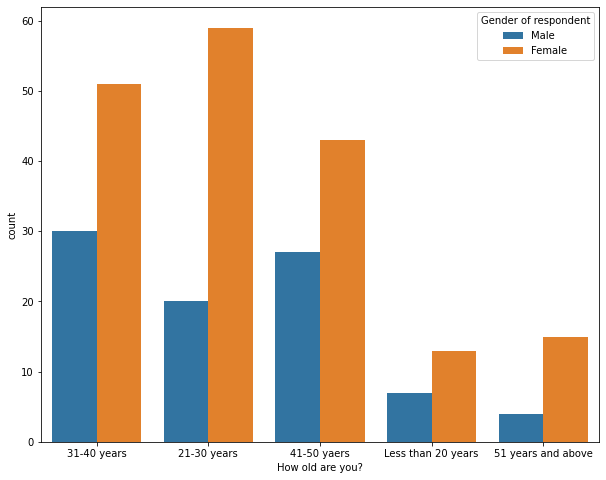

In [17]:
# People participated in survey according to Gender and Age
plt.figure(figsize=(10,8))
sns.countplot(personal['How old are you?'],hue=personal['Gender of respondent'])

<AxesSubplot:xlabel='How many times you have made an online purchase in the past  year?', ylabel='count'>

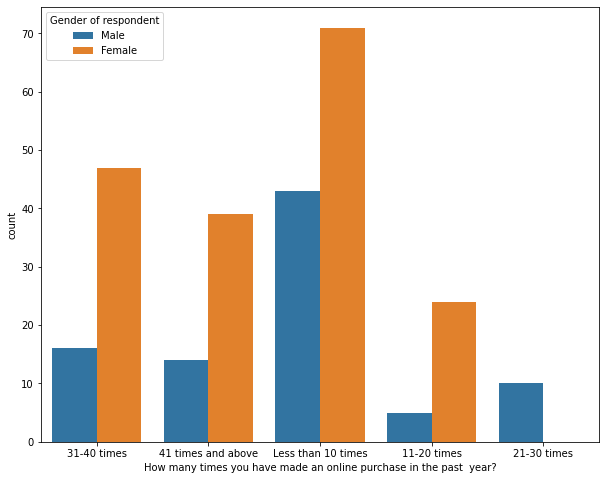

In [18]:
# Number of times shoping done (Gender wise)
plt.figure(figsize=(10,8))
sns.countplot(personal['How many times you have made an online purchase in the past  year?'],hue=personal['Gender of respondent'])

<AxesSubplot:xlabel='How many times you have made an online purchase in the past  year?', ylabel='count'>

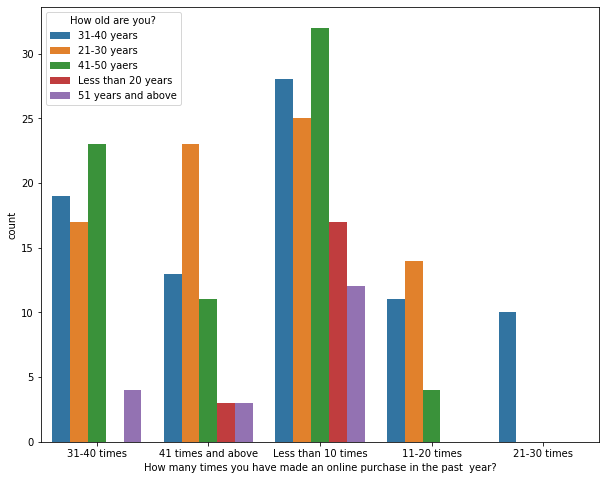

In [19]:
# Number of times shoping done (According to age)
plt.figure(figsize=(10,8))
sns.countplot(personal['How many times you have made an online purchase in the past  year?'],hue=personal['How old are you?'])

<AxesSubplot:xlabel='Since How Long You are Shopping Online ?', ylabel='count'>

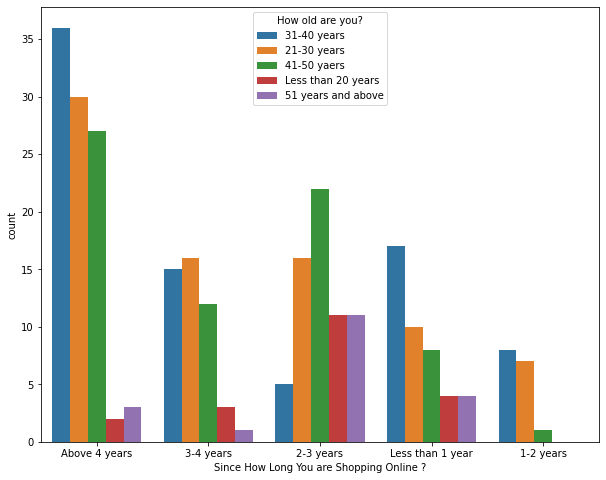

In [20]:
# Number of years customer has been shoping (According to age)
plt.figure(figsize=(10,8))
sns.countplot(personal['Since How Long You are Shopping Online ?'],hue=personal['How old are you?'])

Findings for personal data:                                                                                                                  
1.Number of female(67.29%) is twice as of male(32.71%, who participated in the surveay;                                      
2.90% of the online shoppers are adults aged '31-40 years'(30.11%),'21 -30 years'(29.3%),'41-50 years'(26.02%);                 
3.50% of the online shopping done from Delhi NCR;                                                                              
4.Most of the people have been shoping for more than 4 years, yet most people has shopped only less than 10 times;             
5.Mobile internet is the major source for people for online browsing;                                                           
6.Most of the people use 'Smartphone' for online shoping.                                                                      
7.More than 80% people use 'Google Chrome' browse for accessing the shopping website;                                           
8.Most of the online shopping payments are done through 'Credit/Debit Cards';                                                  
9.Most people abandon their 'bag/shoping cart' for better alternative offer.    

# Visualisation For 'feedbacks' segment data

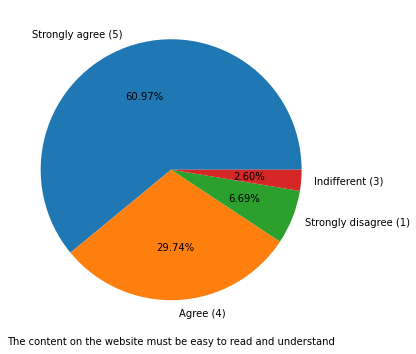

<Figure size 432x288 with 0 Axes>

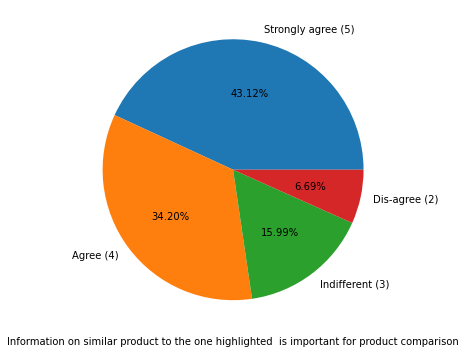

<Figure size 432x288 with 0 Axes>

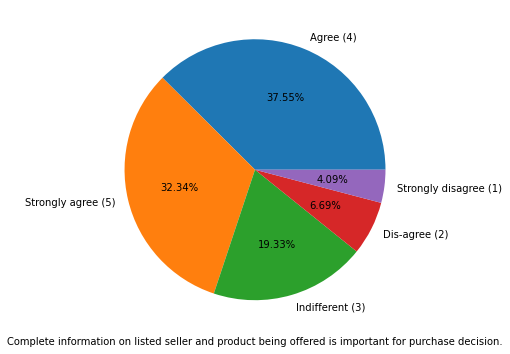

<Figure size 432x288 with 0 Axes>

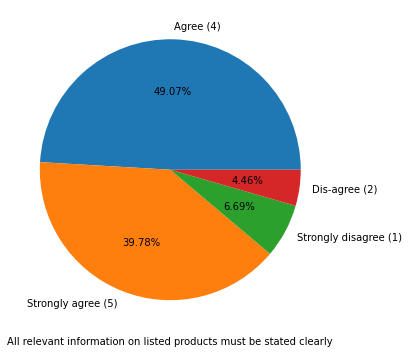

<Figure size 432x288 with 0 Axes>

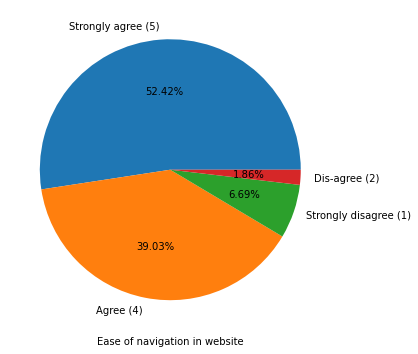

<Figure size 432x288 with 0 Axes>

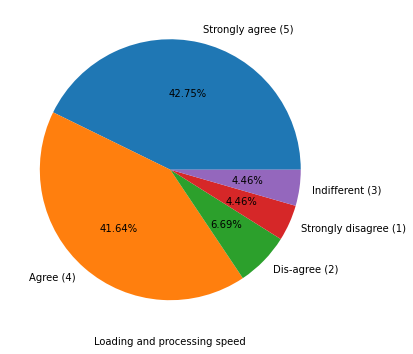

<Figure size 432x288 with 0 Axes>

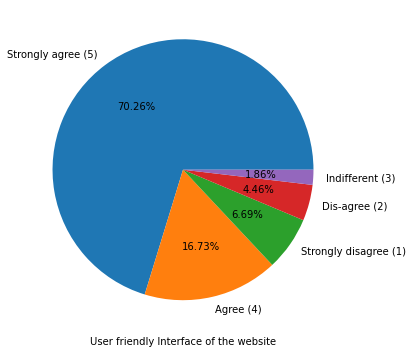

<Figure size 432x288 with 0 Axes>

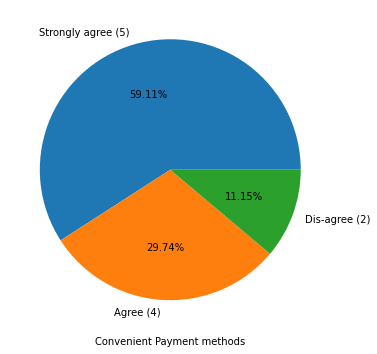

<Figure size 432x288 with 0 Axes>

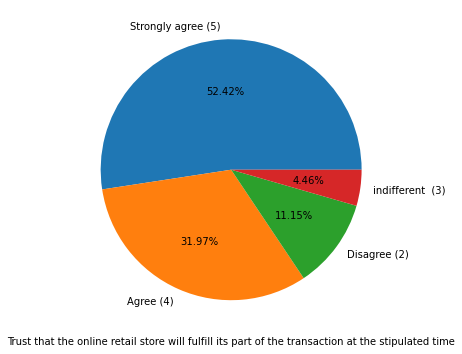

<Figure size 432x288 with 0 Axes>

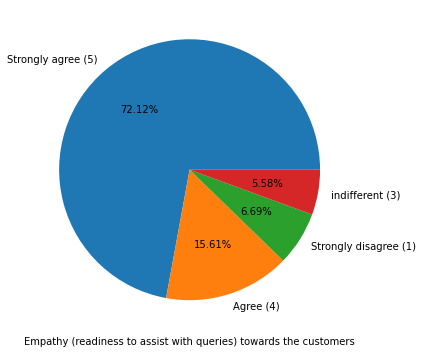

<Figure size 432x288 with 0 Axes>

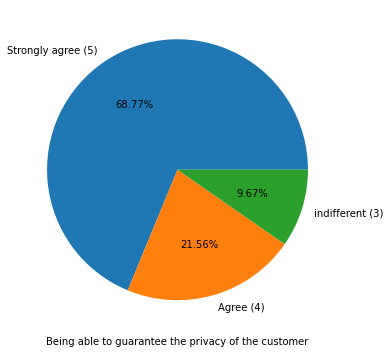

<Figure size 432x288 with 0 Axes>

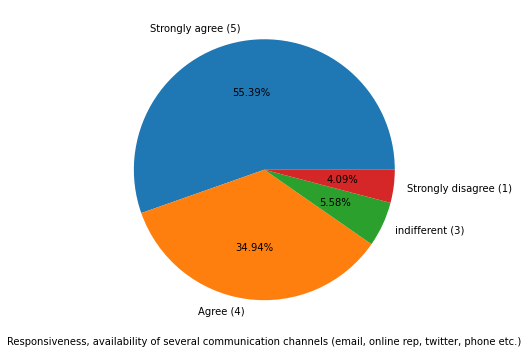

<Figure size 432x288 with 0 Axes>

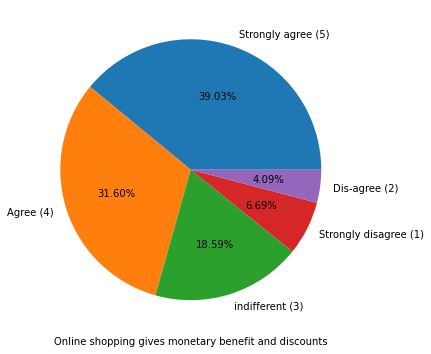

<Figure size 432x288 with 0 Axes>

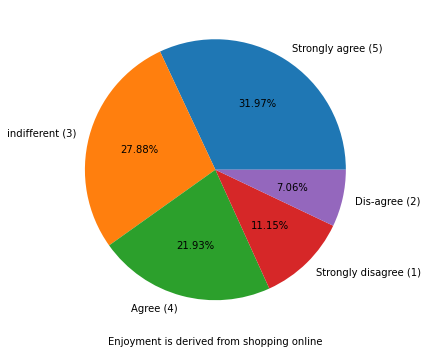

<Figure size 432x288 with 0 Axes>

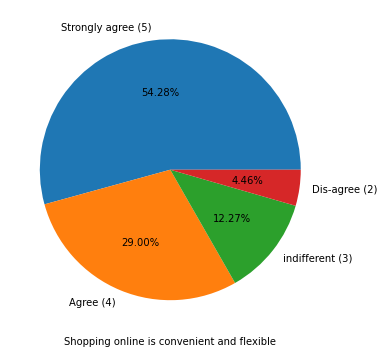

<Figure size 432x288 with 0 Axes>

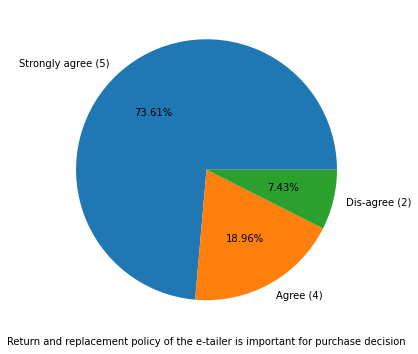

<Figure size 432x288 with 0 Axes>

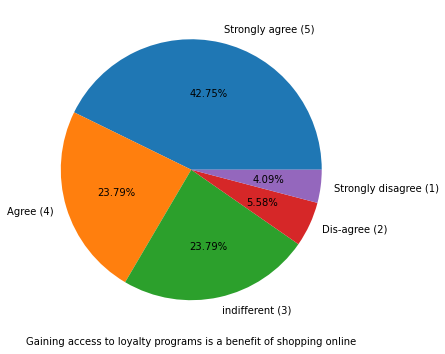

<Figure size 432x288 with 0 Axes>

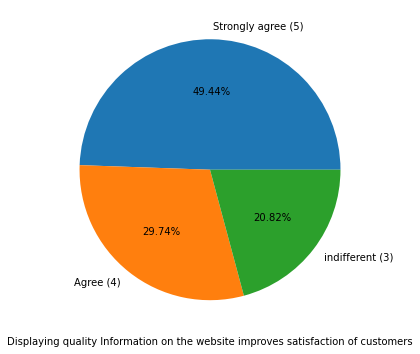

<Figure size 432x288 with 0 Axes>

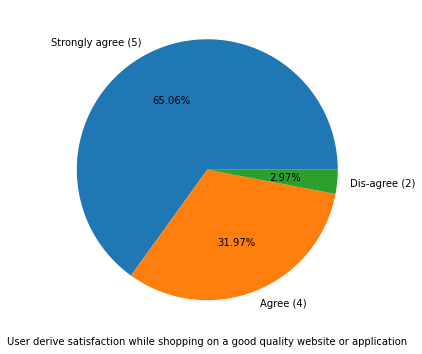

<Figure size 432x288 with 0 Axes>

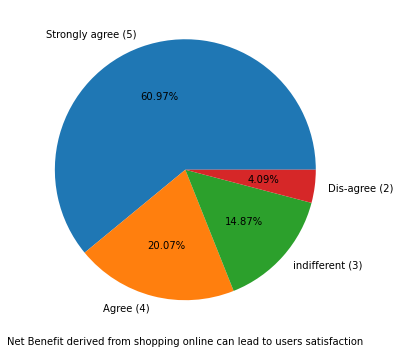

<Figure size 432x288 with 0 Axes>

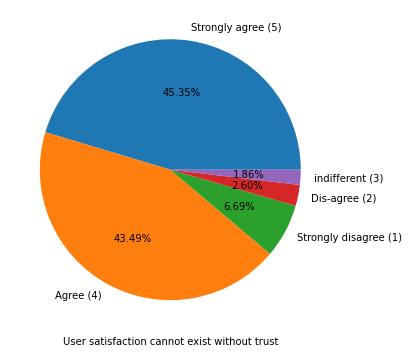

<Figure size 432x288 with 0 Axes>

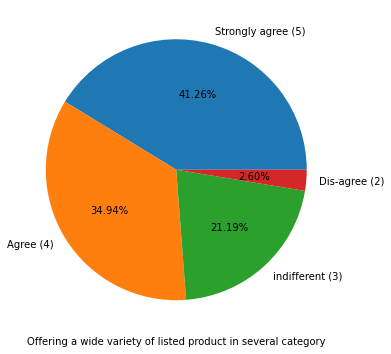

<Figure size 432x288 with 0 Axes>

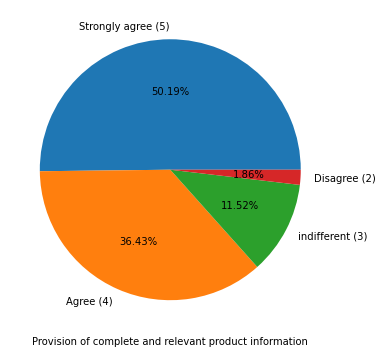

<Figure size 432x288 with 0 Axes>

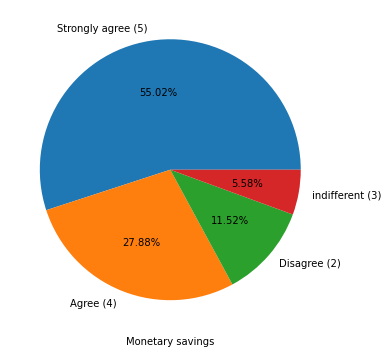

<Figure size 432x288 with 0 Axes>

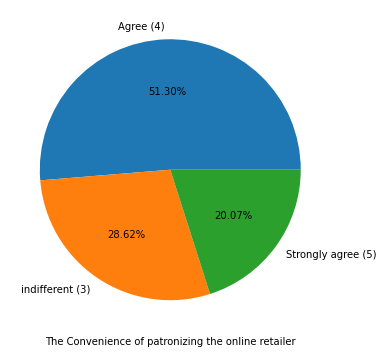

<Figure size 432x288 with 0 Axes>

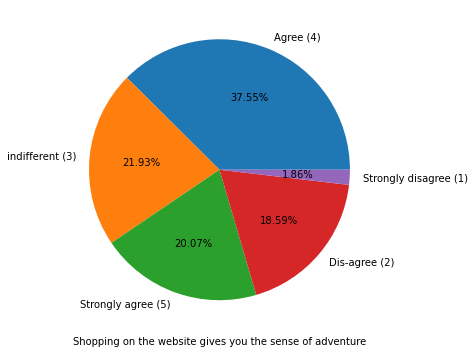

<Figure size 432x288 with 0 Axes>

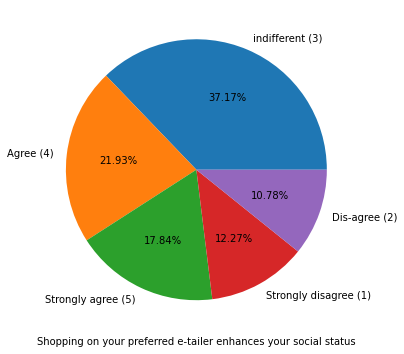

<Figure size 432x288 with 0 Axes>

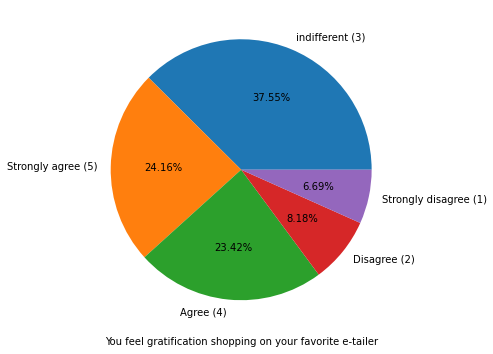

<Figure size 432x288 with 0 Axes>

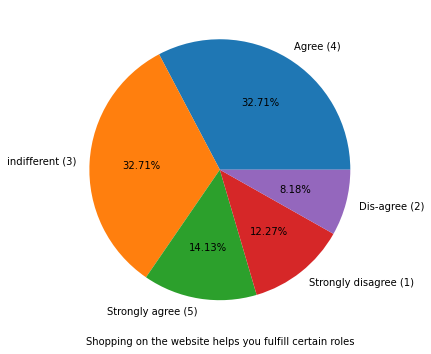

<Figure size 432x288 with 0 Axes>

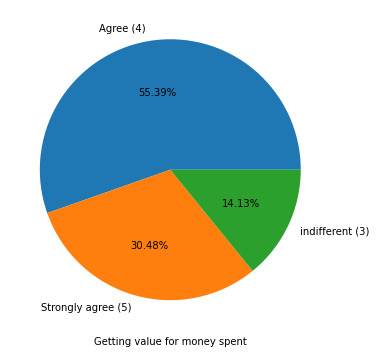

<Figure size 432x288 with 0 Axes>

In [21]:
for i in feedbacks:
    plt.figure(figsize=(6,6))
    df[i].value_counts().plot.pie(autopct='%.2f%%')
    plt.xlabel(i)
    plt.ylabel('')
    plt.figure()

Findings:
1.90% of the participants agree that 'The content of the website must be easy to read and understand';                    
2.Most of the participants agree('Strogly agree':43.12%,'Agree':34.2%) that'Information on similar product to the one highlighted  is important for product comparison';                                                                     
3.Most of the participants agree('Strogly agree':37.55%,'Agree':32.34%) that 'Complete information on listed seller and product being offered is important for purchase decision';                                                                      
4.Almost 90% of the participants agree('Strogly agree':49.07%,'Agree':39.78%) that 'All relevant information on listed products must be stated clearly';                                                                                             

# Visualisation 'Retailor people have shopped from'

<Figure size 432x288 with 0 Axes>

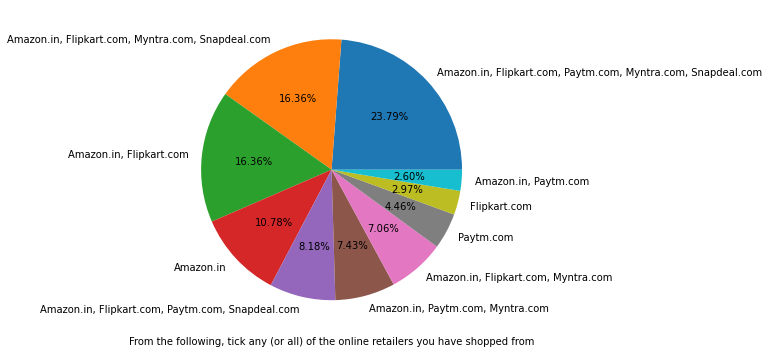

<Figure size 432x288 with 0 Axes>

In [64]:
plt.figure(figsize=(6,6))
retailor_shopped.value_counts().plot.pie(autopct='%.2f%%')
plt.xlabel('From the following, tick any (or all) of the online retailers you have shopped from')
plt.ylabel('')
plt.figure()

# Visualisation For 'Good_attribute' segment data

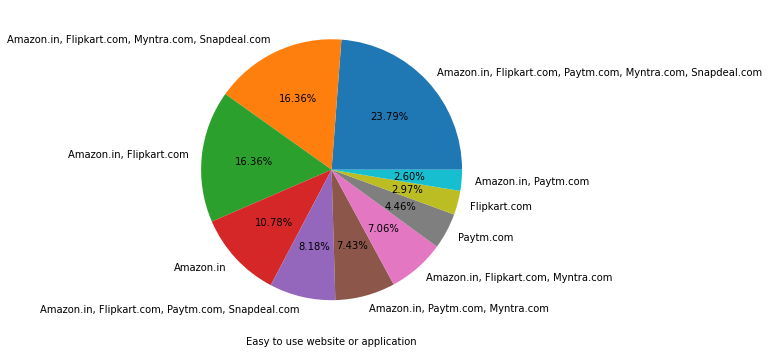

<Figure size 432x288 with 0 Axes>

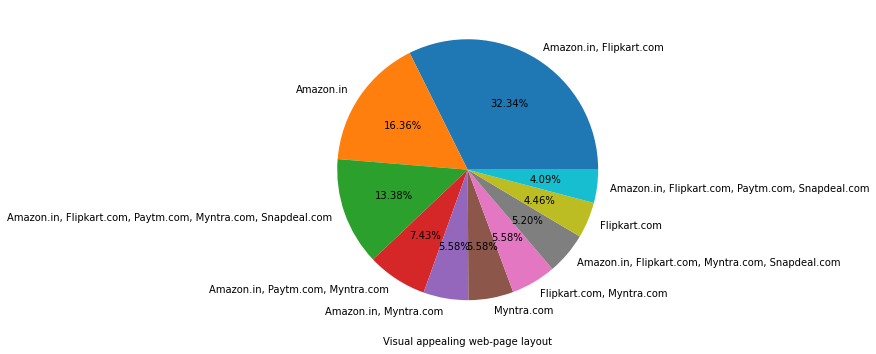

<Figure size 432x288 with 0 Axes>

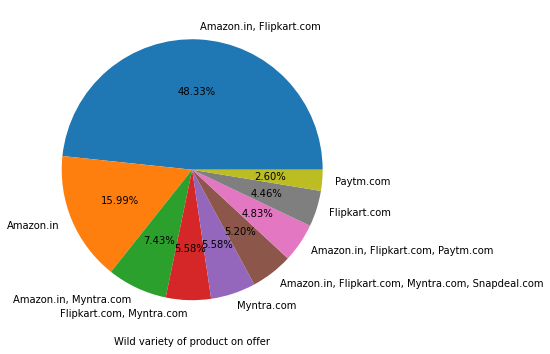

<Figure size 432x288 with 0 Axes>

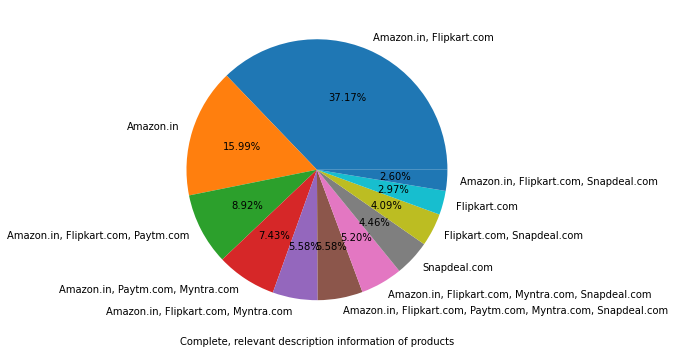

<Figure size 432x288 with 0 Axes>

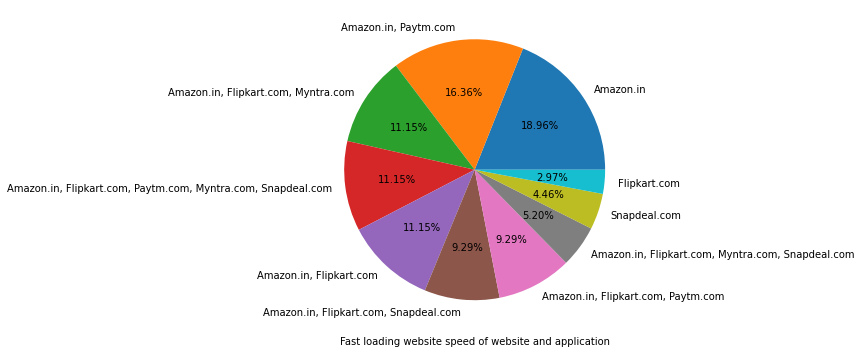

<Figure size 432x288 with 0 Axes>

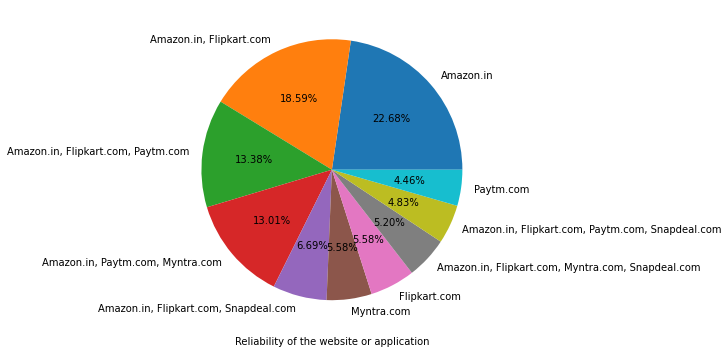

<Figure size 432x288 with 0 Axes>

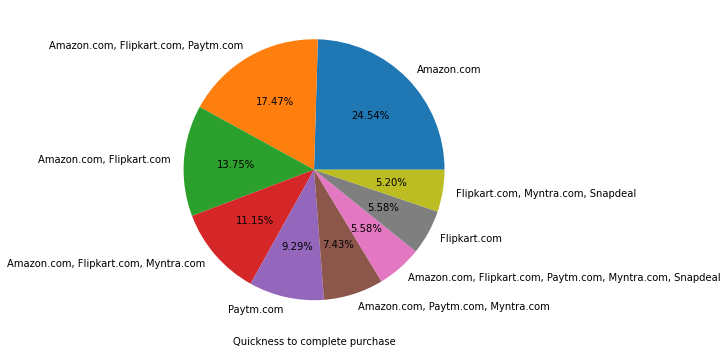

<Figure size 432x288 with 0 Axes>

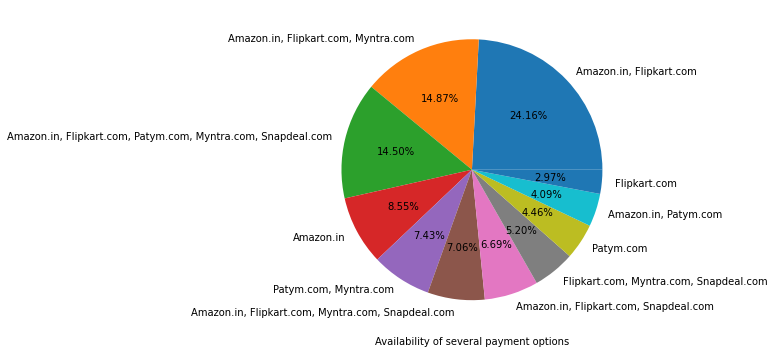

<Figure size 432x288 with 0 Axes>

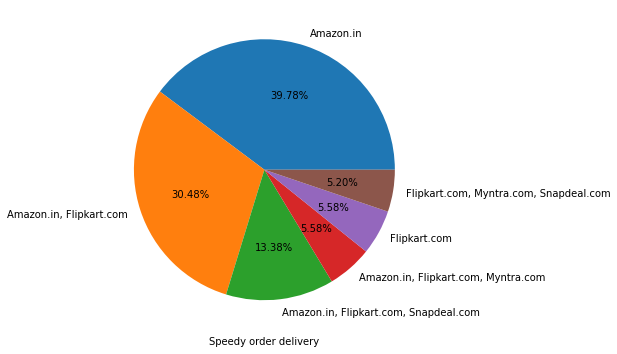

<Figure size 432x288 with 0 Axes>

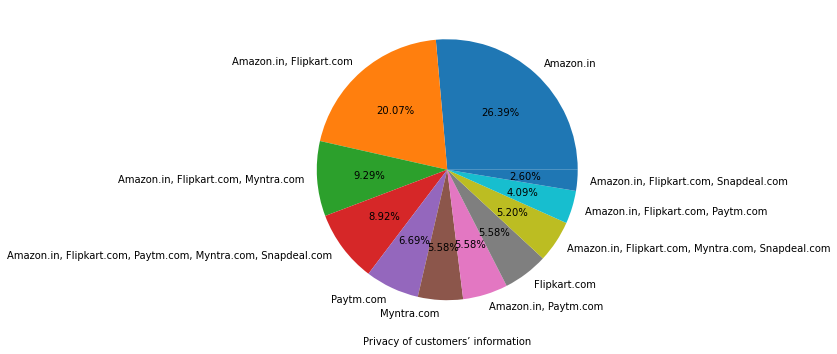

<Figure size 432x288 with 0 Axes>

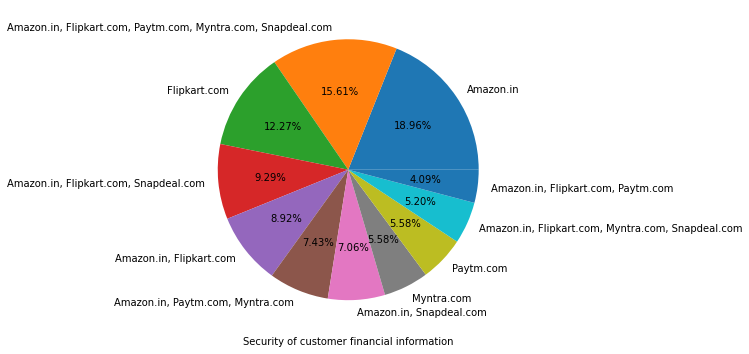

<Figure size 432x288 with 0 Axes>

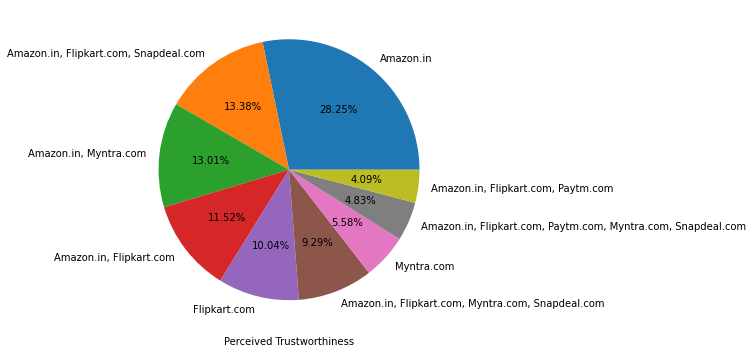

<Figure size 432x288 with 0 Axes>

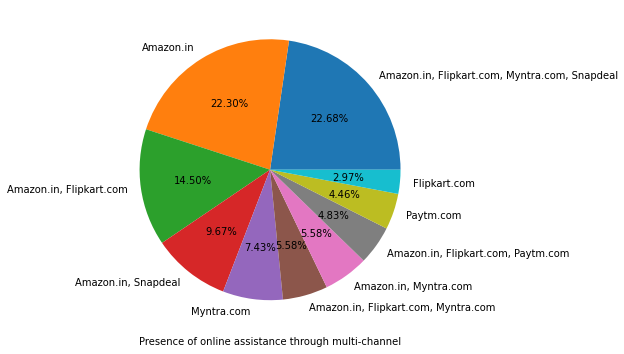

<Figure size 432x288 with 0 Axes>

In [23]:
for i in good_attribute:
    plt.figure(figsize=(6,6))
    df[i].value_counts().plot.pie(autopct='%.2f%%')
    plt.xlabel(i)
    plt.ylabel('')
    plt.figure()

Findings:                                                                                                             
Amazon and Flipkart scored the best in good attributes of their website.                                                       
Most people agree that 'delivery speed of order' of Amazon and Flipkart is better.                                       
Amazon and Flipkart has more variety of product on their site compared to other e-retailers.                 

# Visualisation For 'bad_attribute' segment data

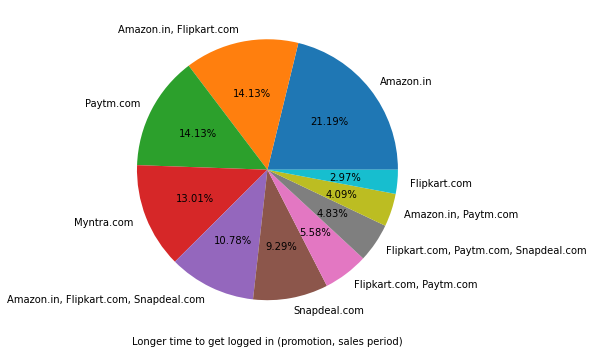

<Figure size 432x288 with 0 Axes>

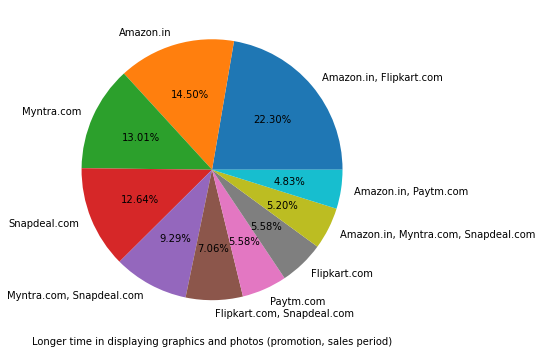

<Figure size 432x288 with 0 Axes>

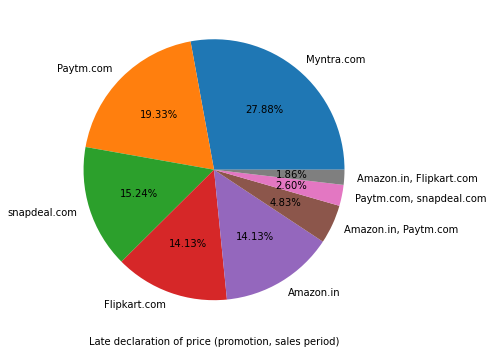

<Figure size 432x288 with 0 Axes>

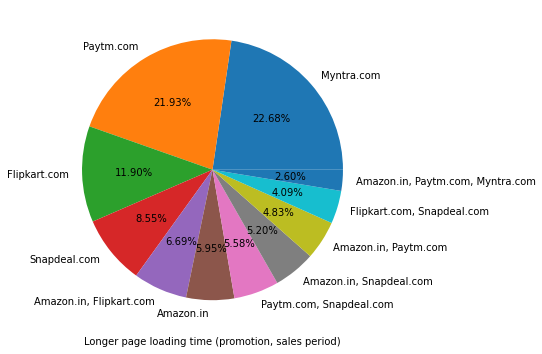

<Figure size 432x288 with 0 Axes>

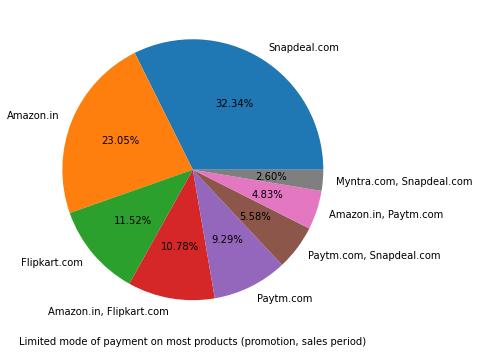

<Figure size 432x288 with 0 Axes>

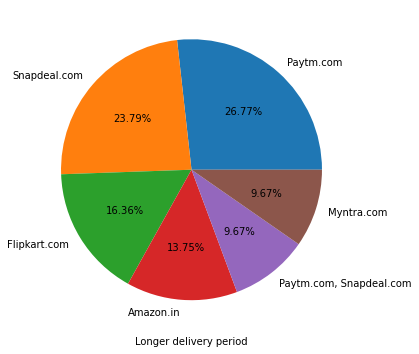

<Figure size 432x288 with 0 Axes>

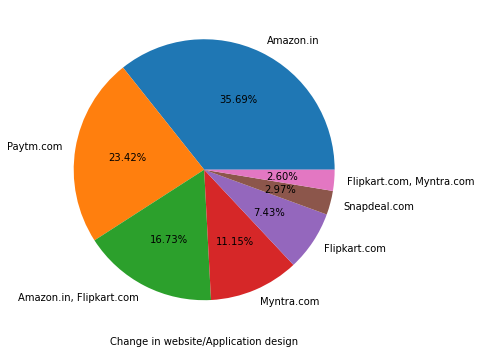

<Figure size 432x288 with 0 Axes>

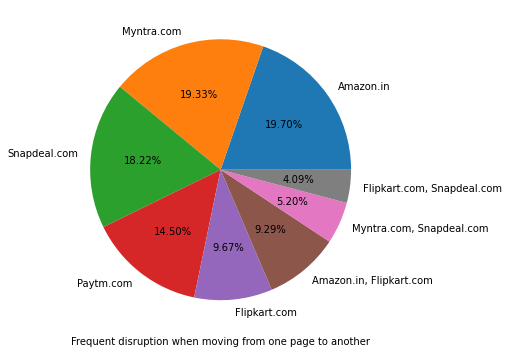

<Figure size 432x288 with 0 Axes>

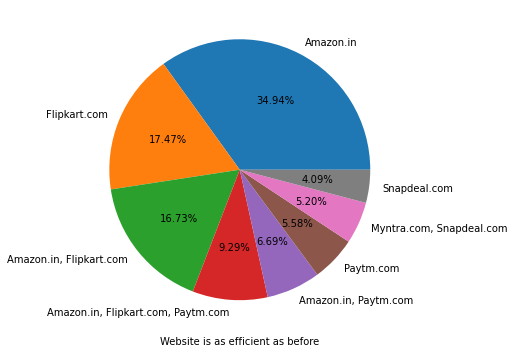

<Figure size 432x288 with 0 Axes>

In [24]:
for i in bad_attribute:
    plt.figure(figsize=(6,6))
    df[i].value_counts().plot.pie(autopct='%.2f%%')
    plt.xlabel(i)
    plt.ylabel('')
    plt.figure()

Findings:                                                                         
    Flipkart and Amazon website takes more time to login.                                          
    Myntra.com website very slow.                                    
    Paytm.com and snapdael.com has poor delivery system and take longer time.
    

# Why did people abandon their bag

<AxesSubplot:xlabel='Why did you abandon the “Bag”, “Shopping Cart”?', ylabel='From the following, tick any (or all) of the online retailers you have shopped from'>

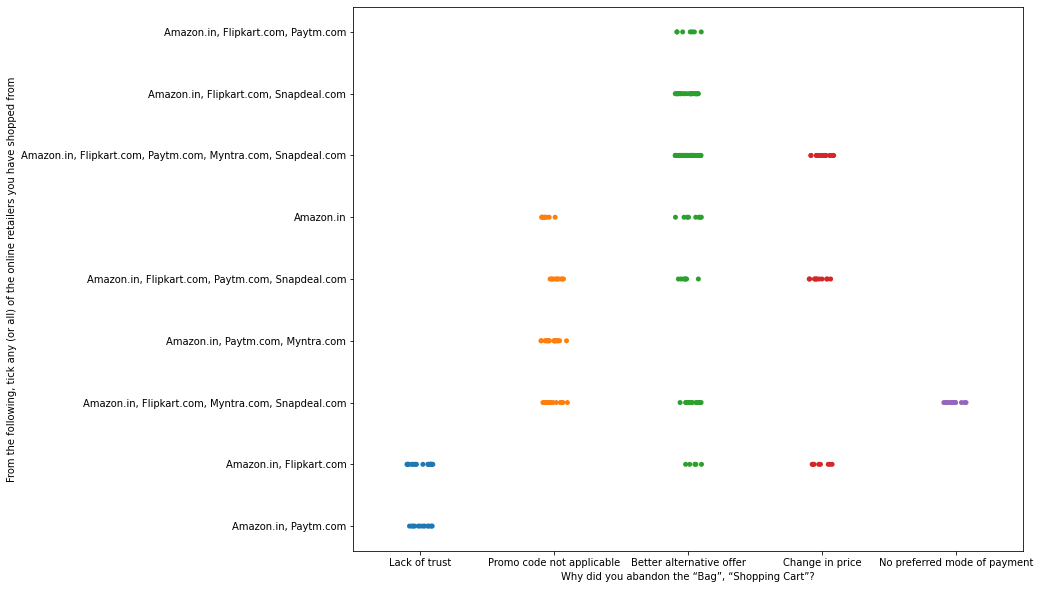

In [26]:
plt.figure(figsize=(12,10))
sns.stripplot(df['Why did you abandon the “Bag”, “Shopping Cart”?'],
              df['From the following, tick any (or all) of the online retailers you have shopped from'])



From the plot we can see that main reason for abandoning the bag is 'better alternative option' followed by others reason like 'Change in price' and 'Promo code not applicable'.

# Data Preprocessing

In [27]:
# Replacing 'Strongly disagree (1)','Dis-agree (2)','Indifferent (3)','Agree (4)','Strongly agree (5)' with 1,2,3,4,5

df.replace(['Strongly disagree (1)','Dis-agree (2)','Indifferent (3)','Agree (4)','Strongly agree (5)'], [1,2,3,4,5], inplace=True)




In [28]:
df.head()

,Gender of respondent,How old are you?,Which city do you shop online from?,What is the Pin Code of where you shop online from?,Since How Long You are Shopping Online ?,How many times you have made an online purchase in the past year?,How do you access the internet while shopping on-line?,Which device do you use to access the online shopping?,What is the screen size of your mobile device?,What is the operating system (OS) of your device?,What browser do you run on your device to access the website?,Which channel did you follow to arrive at your favorite online store for the first time?,"After first visit, how do you reach the online retail store?",How much time do you explore the e- retail store before making a purchase decision?,What is your preferred payment Option?,How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?,"Why did you abandon the “Bag”, “Shopping Cart”?",The content on the website must be easy to read and understand,Information on similar product to the one highlighted is important for product comparison,Complete information on listed seller and product being offered is important for purchase decision.,All relevant information on listed products must be stated clearly,Ease of navigation in website,Loading and processing speed,User friendly Interface of the website,Convenient Payment methods,Trust that the online retail store will fulfill its part of the transaction at the stipulated time,Empathy (readiness to assist with queries) towards the customers,Being able to guarantee the privacy of the customer,"Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)",Online shopping gives monetary benefit and discounts,Enjoyment is derived from shopping online,Shopping online is convenient and flexible,Return and replacement policy of the e-tailer is important for purchase decision,Gaining access to loyalty programs is a benefit of shopping online,Displaying quality Information on the website improves satisfaction of customers,User derive satisfaction while shopping on a good quality website or application,Net Benefit derived from shopping online can lead to users satisfaction,User satisfaction cannot exist without trust,Offering a wide variety of listed product in several category,Provision of complete and relevant product information,Monetary savings,The Convenience of patronizing the online retailer,Shopping on the website gives you the sense of adventure,Shopping on your preferred e-tailer enhances your social status,You feel gratification shopping on your favorite e-tailer,Shopping on the website helps you fulfill certain roles,Getting value for money spent,"From the following, tick any (or all) of the online retailers you have shopped from",Easy to use website or application,Visual appealing web-page layout,Wild variety of product on offer,"Complete, relevant description information of products",Fast loading website speed of website and application,Reliability of the website or application,Quickness to complete purchase,Availability of several payment options,Speedy order delivery,Privacy of customers’ information,Security of customer financial information,Perceived Trustworthiness,Presence of online assistance through multi-channel,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,Male,31-40 years,Delhi,110009,Above 4 years,31-40 times,Dial-up,Desktop,Others,Window/windows Mobile,Google chrome,Search Engine,Search Engine,6-10 mins,"E-wallets (Pa

In [29]:
# As 'Disagree (2)','indifferent (3)' are not yet replaced we will replaec them as well

df.replace(['Disagree (2)','indifferent (3)'], [2,3], inplace=True)

In [30]:
# checking whether all value has been changed or not
for i in df:
    print(i,'\n', df[i].unique())
    print('\n')

Gender of respondent 
 ['Male' 'Female']


How old are you? 
 ['31-40 years' '21-30 years' '41-50 yaers' 'Less than 20 years'
 '51 years and above']


Which city do you shop online from? 
 ['Delhi' 'Noida' 'Karnal ' 'Bangalore ' 'Solan' 'Moradabad' 'Gurgaon '
 'Merrut' 'Ghaziabad' 'Bulandshahr']


What is the Pin Code of where you shop online from? 
 [110009 110030 201308 132001 530068 110011 110018 173229 110039 244001
 122018 201310 560037 203207 250001 201005 110044 201306 560010 201305
 110042 132036 560018 110008 560002 201303 201312 203202 560001 201304
 560003 110014 560013 173212 122009 201009 201008 201001 203001]


Since How Long You are Shopping Online ? 
 ['Above 4 years' '3-4 years' '2-3 years' 'Less than 1 year' '1-2 years']


How many times you have made an online purchase in the past  year? 
 ['31-40 times' '41 times and above' 'Less than 10 times' '11-20 times'
 '21-30 times']


How do you access the internet while shopping on-line? 
 ['Dial-up' 'Wi-Fi' 'Mobile Interne

In [31]:
# 'indifferent  (3)' was left so changing it as well
df.replace(['indifferent  (3)'], [3], inplace=True)

In [32]:
# Encoding gender column
df['Gender of respondent'].replace(['Male', 'Female'], [0,1], inplace=True)

Deviding Data into feature(x) and target(y)

In [33]:
x=df.drop('Which of the Indian online retailer would you recommend to a friend?',axis=1)
y=df['Which of the Indian online retailer would you recommend to a friend?']

Encoding remaining categorical columns

In [34]:
cat_columns=[i for i in x.columns if x[i].dtypes=='O']

In [35]:
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder
ordinal=OrdinalEncoder()
labe=LabelEncoder()

#using ordinal encoder for independent features
for i in cat_columns:
    x[i]=ordinal.fit_transform(x[i].values.reshape(-1,1))

#Using label encoder for target Column
y=labe.fit_transform(y)

In [36]:
x.head()

,Gender of respondent,How old are you?,Which city do you shop online from?,What is the Pin Code of where you shop online from?,Since How Long You are Shopping Online ?,How many times you have made an online purchase in the past year?,How do you access the internet while shopping on-line?,Which device do you use to access the online shopping?,What is the screen size of your mobile device?,What is the operating system (OS) of your device?,What browser do you run on your device to access the website?,Which channel did you follow to arrive at your favorite online store for the first time?,"After first visit, how do you reach the online retail store?",How much time do you explore the e- retail store before making a purchase decision?,What is your preferred payment Option?,How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?,"Why did you abandon the “Bag”, “Shopping Cart”?",The content on the website must be easy to read and understand,Information on similar product to the one highlighted is important for product comparison,Complete information on listed seller and product being offered is important for purchase decision.,All relevant information on listed products must be stated clearly,Ease of navigation in website,Loading and processing speed,User friendly Interface of the website,Convenient Payment methods,Trust that the online retail store will fulfill its part of the transaction at the stipulated time,Empathy (readiness to assist with queries) towards the customers,Being able to guarantee the privacy of the customer,"Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)",Online shopping gives monetary benefit and discounts,Enjoyment is derived from shopping online,Shopping online is convenient and flexible,Return and replacement policy of the e-tailer is important for purchase decision,Gaining access to loyalty programs is a benefit of shopping online,Displaying quality Information on the website improves satisfaction of customers,User derive satisfaction while shopping on a good quality website or application,Net Benefit derived from shopping online can lead to users satisfaction,User satisfaction cannot exist without trust,Offering a wide variety of listed product in several category,Provision of complete and relevant product information,Monetary savings,The Convenience of patronizing the online retailer,Shopping on the website gives you the sense of adventure,Shopping on your preferred e-tailer enhances your social status,You feel gratification shopping on your favorite e-tailer,Shopping on the website helps you fulfill certain roles,Getting value for money spent,"From the following, tick any (or all) of the online retailers you have shopped from",Easy to use website or application,Visual appealing web-page layout,Wild variety of product on offer,"Complete, relevant description information of products",Fast loading website speed of website and application,Reliability of the website or application,Quickness to complete purchase,Availability of several payment options,Speedy order delivery,Privacy of customers’ information,Security of customer financial information,Perceived Trustworthiness,Presence of online assistance through multi-channel,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before
0,0,1.0,2.0,110009,3.0,2.0,0.0,0.0,3.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,4,3,3,4,4,1,2,2,2,5,4,4,3,1,2,2,4,3,5,4,5,3,3,2,3,4,4,5,4,5,7.0,9.0,7.0,5.0,10.0,9.0,9.0,8.0,9.0,0.0,0.0,0.0,7.0,9.0,0.0,0.0,3.0,5.0,0.0,3.0,2.0,0.0,0.0
1,1,0.0,2.0,11

In [37]:
# checking unique value of x
for i in x:
    print(i,'\n', x[i].unique())
    print('\n')

Gender of respondent 
 [0 1]


How old are you? 
 [1. 0. 2. 4. 3.]


Which city do you shop online from? 
 [2. 8. 5. 0. 9. 7. 4. 6. 3. 1.]


What is the Pin Code of where you shop online from? 
 [110009 110030 201308 132001 530068 110011 110018 173229 110039 244001
 122018 201310 560037 203207 250001 201005 110044 201306 560010 201305
 110042 132036 560018 110008 560002 201303 201312 203202 560001 201304
 560003 110014 560013 173212 122009 201009 201008 201001 203001]


Since How Long You are Shopping Online ? 
 [3. 2. 1. 4. 0.]


How many times you have made an online purchase in the past  year? 
 [2. 3. 4. 0. 1.]


How do you access the internet while shopping on-line? 
 [0. 2. 1.]


Which device do you use to access the online shopping? 
 [0. 2. 3. 1.]


What is the screen size of your mobile device? 
 [3. 0. 2. 1.]


What is the operating system (OS) of your device? 
 [2. 1. 0.]


What browser do you run on your device to access the website? 
 [0. 3. 2. 1.]


Which channel did you 

We will drop pin code column from feature(x) as the values are very high and pin code does not have relation with target.

In [38]:
# Droping the pin code column
x=x.drop('What is the Pin Code of where you shop online from?',axis=1)

In [39]:
x.head()

,Gender of respondent,How old are you?,Which city do you shop online from?,Since How Long You are Shopping Online ?,How many times you have made an online purchase in the past year?,How do you access the internet while shopping on-line?,Which device do you use to access the online shopping?,What is the screen size of your mobile device?,What is the operating system (OS) of your device?,What browser do you run on your device to access the website?,Which channel did you follow to arrive at your favorite online store for the first time?,"After first visit, how do you reach the online retail store?",How much time do you explore the e- retail store before making a purchase decision?,What is your preferred payment Option?,How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?,"Why did you abandon the “Bag”, “Shopping Cart”?",The content on the website must be easy to read and understand,Information on similar product to the one highlighted is important for product comparison,Complete information on listed seller and product being offered is important for purchase decision.,All relevant information on listed products must be stated clearly,Ease of navigation in website,Loading and processing speed,User friendly Interface of the website,Convenient Payment methods,Trust that the online retail store will fulfill its part of the transaction at the stipulated time,Empathy (readiness to assist with queries) towards the customers,Being able to guarantee the privacy of the customer,"Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)",Online shopping gives monetary benefit and discounts,Enjoyment is derived from shopping online,Shopping online is convenient and flexible,Return and replacement policy of the e-tailer is important for purchase decision,Gaining access to loyalty programs is a benefit of shopping online,Displaying quality Information on the website improves satisfaction of customers,User derive satisfaction while shopping on a good quality website or application,Net Benefit derived from shopping online can lead to users satisfaction,User satisfaction cannot exist without trust,Offering a wide variety of listed product in several category,Provision of complete and relevant product information,Monetary savings,The Convenience of patronizing the online retailer,Shopping on the website gives you the sense of adventure,Shopping on your preferred e-tailer enhances your social status,You feel gratification shopping on your favorite e-tailer,Shopping on the website helps you fulfill certain roles,Getting value for money spent,"From the following, tick any (or all) of the online retailers you have shopped from",Easy to use website or application,Visual appealing web-page layout,Wild variety of product on offer,"Complete, relevant description information of products",Fast loading website speed of website and application,Reliability of the website or application,Quickness to complete purchase,Availability of several payment options,Speedy order delivery,Privacy of customers’ information,Security of customer financial information,Perceived Trustworthiness,Presence of online assistance through multi-channel,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before
0,0,1.0,2.0,3.0,2.0,0.0,0.0,3.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,4,3,3,4,4,1,2,2,2,5,4,4,3,1,2,2,4,3,5,4,5,3,3,2,3,4,4,5,4,5,7.0,9.0,7.0,5.0,10.0,9.0,9.0,8.0,9.0,0.0,0.0,0.0,7.0,9.0,0.0,0.0,3.0,5.0,0.0,3.0,2.0,0.0,0.0
1,1,0.0,2.0,3.0,3.0,2.0,2.0,0.0,1.0,0.0,2.0,4.0,4.0,1.0,3.0,4.0,5,5,5,5,5

Scaling

In [40]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
scaler=MinMaxScaler()

xd=scaler.fit_transform(x)
x=pd.DataFrame(xd,columns=x.columns)

In [41]:
x.head()

,Gender of respondent,How old are you?,Which city do you shop online from?,Since How Long You are Shopping Online ?,How many times you have made an online purchase in the past year?,How do you access the internet while shopping on-line?,Which device do you use to access the online shopping?,What is the screen size of your mobile device?,What is the operating system (OS) of your device?,What browser do you run on your device to access the website?,Which channel did you follow to arrive at your favorite online store for the first time?,"After first visit, how do you reach the online retail store?",How much time do you explore the e- retail store before making a purchase decision?,What is your preferred payment Option?,How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?,"Why did you abandon the “Bag”, “Shopping Cart”?",The content on the website must be easy to read and understand,Information on similar product to the one highlighted is important for product comparison,Complete information on listed seller and product being offered is important for purchase decision.,All relevant information on listed products must be stated clearly,Ease of navigation in website,Loading and processing speed,User friendly Interface of the website,Convenient Payment methods,Trust that the online retail store will fulfill its part of the transaction at the stipulated time,Empathy (readiness to assist with queries) towards the customers,Being able to guarantee the privacy of the customer,"Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)",Online shopping gives monetary benefit and discounts,Enjoyment is derived from shopping online,Shopping online is convenient and flexible,Return and replacement policy of the e-tailer is important for purchase decision,Gaining access to loyalty programs is a benefit of shopping online,Displaying quality Information on the website improves satisfaction of customers,User derive satisfaction while shopping on a good quality website or application,Net Benefit derived from shopping online can lead to users satisfaction,User satisfaction cannot exist without trust,Offering a wide variety of listed product in several category,Provision of complete and relevant product information,Monetary savings,The Convenience of patronizing the online retailer,Shopping on the website gives you the sense of adventure,Shopping on your preferred e-tailer enhances your social status,You feel gratification shopping on your favorite e-tailer,Shopping on the website helps you fulfill certain roles,Getting value for money spent,"From the following, tick any (or all) of the online retailers you have shopped from",Easy to use website or application,Visual appealing web-page layout,Wild variety of product on offer,"Complete, relevant description information of products",Fast loading website speed of website and application,Reliability of the website or application,Quickness to complete purchase,Availability of several payment options,Speedy order delivery,Privacy of customers’ information,Security of customer financial information,Perceived Trustworthiness,Presence of online assistance through multi-channel,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before
0,0.0,0.25,0.222222,0.75,0.50,0.0,0.000000,1.000000,1.0,0.0,1.0,0.5,0.50,1.0,0.666667,0.5,0.75,0.333333,0.50,0.75,0.75,0.00,0.25,0.0,0.000000,1.0,0.5,0.75,0.50,0.0,0.000000,0.000000,0.75,0.0,1.000000,0.666667,1.00,0.333333,0.333333,0.0,0.0,0.75,0.75,1.00,0.75,1.0,0.875,1.000000,0.777778,0.

# ML Modeling

In [42]:
# Getting the best random stae value
logmodel = LogisticRegression()
for i in range(0,10):
    x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=i)
    logmodel.fit(x_train,y_train)
    pred_train=logmodel.predict(x_train)
    pred_test=logmodel.predict(x_test) 
    if (accuracy_score(y_train,pred_train)*100>80 and accuracy_score(y_test,pred_test)*100>80):
                      print("At random state", i ,"the training accuracy is", accuracy_score(y_train,pred_train))
                      print("At random state", i ,"the test accuracy is", accuracy_score(y_test,pred_test))
                      print("\n")

At random state 0 the training accuracy is 1.0
At random state 0 the test accuracy is 1.0


At random state 1 the training accuracy is 1.0
At random state 1 the test accuracy is 1.0


At random state 2 the training accuracy is 1.0
At random state 2 the test accuracy is 1.0


At random state 3 the training accuracy is 1.0
At random state 3 the test accuracy is 1.0


At random state 4 the training accuracy is 1.0
At random state 4 the test accuracy is 0.9814814814814815


At random state 5 the training accuracy is 1.0
At random state 5 the test accuracy is 1.0


At random state 6 the training accuracy is 1.0
At random state 6 the test accuracy is 1.0


At random state 7 the training accuracy is 1.0
At random state 7 the test accuracy is 1.0


At random state 8 the training accuracy is 1.0
At random state 8 the test accuracy is 1.0


At random state 9 the training accuracy is 1.0
At random state 9 the test accuracy is 1.0




At every random state we are receiving great accuracy of model, we can put any of the random stae value.

In [43]:
#Spliting the data into test and train set
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=2)
print(x.shape,x_train.shape,x_test.shape)

(269, 69) (215, 69) (54, 69)


LogisticRegression

In [44]:
logmodel.fit(x_train,y_train)
pred_test=logmodel.predict(x_test)
print(accuracy_score(y_test,pred_test))
print(confusion_matrix(y_test,pred_test))
print(classification_report(y_test,pred_test))

1.0
[[14  0  0  0  0  0  0  0]
 [ 0 12  0  0  0  0  0  0]
 [ 0  0  2  0  0  0  0  0]
 [ 0  0  0  9  0  0  0  0]
 [ 0  0  0  0  2  0  0  0]
 [ 0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0 11  0]
 [ 0  0  0  0  0  0  0  3]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00        11
           7       1.00      1.00      1.00         3

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



Cross Vallidation of model

In [45]:
from sklearn.model_selection import cross_val_score

In [46]:
# cross validation of LogisticRegression(logmodel) model
cv_score=cross_val_score(logmodel,x,y)
cv_mean=cv_score.mean()
print(f"cv score is {cv_mean}")
print('Difference between accuracy and validation score', accuracy_score(y_test,pred_test)-cv_mean)

cv score is 0.9962962962962962
Difference between accuracy and validation score 0.0037037037037037646


# Ensemble Technique

Our LogisticRegression model already has very high accuracy, so we don't actually need to apply ensemble technique.          
Though we will try this with few of the algorithm for our better knowledge.

In [47]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

RandomForestClassifier

In [48]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

pred_test_rfc=rfc.predict(x_test)
print(accuracy_score(y_test,pred_test_rfc))
print(confusion_matrix(y_test,pred_test_rfc))
print(classification_report(y_test,pred_test_rfc))

1.0
[[14  0  0  0  0  0  0  0]
 [ 0 12  0  0  0  0  0  0]
 [ 0  0  2  0  0  0  0  0]
 [ 0  0  0  9  0  0  0  0]
 [ 0  0  0  0  2  0  0  0]
 [ 0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0 11  0]
 [ 0  0  0  0  0  0  0  3]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00        11
           7       1.00      1.00      1.00         3

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



In [49]:
# cross validation of RandomForestClassifier model
cv_score=cross_val_score(rfc,x,y)
cv_mean=cv_score.mean()
print(f"cv score is {cv_mean}")
print('Difference between accuracy and validation score', accuracy_score(y_test,pred_test_rfc)-cv_mean)

cv score is 1.0
Difference between accuracy and validation score 0.0


GradientBoostingClassifier

In [50]:
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
pred_test_gb=gb.predict(x_test)
print(accuracy_score(y_test,pred_test_gb))
print(confusion_matrix(y_test,pred_test_gb))
print(classification_report(y_test,pred_test_gb))

1.0
[[14  0  0  0  0  0  0  0]
 [ 0 12  0  0  0  0  0  0]
 [ 0  0  2  0  0  0  0  0]
 [ 0  0  0  9  0  0  0  0]
 [ 0  0  0  0  2  0  0  0]
 [ 0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0 11  0]
 [ 0  0  0  0  0  0  0  3]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00        11
           7       1.00      1.00      1.00         3

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



In [51]:
# cross validation of GradientBoostingClassifier model
cv_score=cross_val_score(gb,x,y)
cv_mean=cv_score.mean()
print(f"cv score is {cv_mean}")
print('Difference between accuracy and validation score', accuracy_score(y_test,pred_test_gb)-cv_mean)

cv score is 1.0
Difference between accuracy and validation score 0.0


AdaBoostClassifier

In [52]:
ada=AdaBoostClassifier()
ada.fit(x_train,y_train)
pred_test_ada=ada.predict(x_test)
print(accuracy_score(y_test,pred_test_ada))
print(confusion_matrix(y_test,pred_test_ada))
print(classification_report(y_test,pred_test_ada))

0.7592592592592593
[[14  0  0  0  0  0  0  0]
 [ 0 12  0  0  0  0  0  0]
 [ 0  2  0  0  0  0  0  0]
 [ 0  0  0  9  0  0  0  0]
 [ 0  0  0  0  2  0  0  0]
 [ 0  0  0  0  0  1  0  0]
 [ 0 11  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  3]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.48      1.00      0.65        12
           2       0.00      0.00      0.00         2
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         1
           6       0.00      0.00      0.00        11
           7       1.00      1.00      1.00         3

    accuracy                           0.76        54
   macro avg       0.69      0.75      0.71        54
weighted avg       0.64      0.76      0.68        54



In [53]:
# cross validation of AdaBoostClassifier model
cv_score=cross_val_score(ada,x,y,cv=6)
cv_mean=cv_score.mean()
print(f"cv score is {cv_mean}")
print('Difference between accuracy and validation score', accuracy_score(y_test,pred_test_ada)-cv_mean)

cv score is 0.7956228956228957
Difference between accuracy and validation score -0.036363636363636376


BaggingClassifier

In [54]:
bag=BaggingClassifier()
bag.fit(x_train,y_train)
pred_test_bag=bag.predict(x_test)
print(accuracy_score(y_test,pred_test_bag))
print(confusion_matrix(y_test,pred_test_bag))
print(classification_report(y_test,pred_test_bag))

1.0
[[14  0  0  0  0  0  0  0]
 [ 0 12  0  0  0  0  0  0]
 [ 0  0  2  0  0  0  0  0]
 [ 0  0  0  9  0  0  0  0]
 [ 0  0  0  0  2  0  0  0]
 [ 0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0 11  0]
 [ 0  0  0  0  0  0  0  3]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00        11
           7       1.00      1.00      1.00         3

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



In [55]:
# cross validation of BaggingClassifier model
cv_score=cross_val_score(bag,x,y,cv=6)
cv_mean=cv_score.mean()
print(f"the cv score is {cv_mean}")
print('Difference between accuracy and validation score', accuracy_score(y_test,pred_test_bag)-cv_mean)

the cv score is 1.0
Difference between accuracy and validation score 0.0


ExtraTreesClassifier

In [56]:
etc=ExtraTreesClassifier()
etc.fit(x_train,y_train)
pred_test_etc=etc.predict(x_test)
print(accuracy_score(y_test,pred_test_etc))
print(confusion_matrix(y_test,pred_test_etc))
print(classification_report(y_test,pred_test_etc))

1.0
[[14  0  0  0  0  0  0  0]
 [ 0 12  0  0  0  0  0  0]
 [ 0  0  2  0  0  0  0  0]
 [ 0  0  0  9  0  0  0  0]
 [ 0  0  0  0  2  0  0  0]
 [ 0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0 11  0]
 [ 0  0  0  0  0  0  0  3]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00        11
           7       1.00      1.00      1.00         3

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



In [57]:
# cross validation of ExtraTreesClassifier model
cv_score=cross_val_score(etc,x,y,cv=6)
cv_mean=cv_score.mean()
print(f"The cv score is {cv_mean}")
print('Difference between accuracy and validation score', accuracy_score(y_test,pred_test_etc)-cv_mean)

The cv score is 1.0
Difference between accuracy and validation score 0.0


Support Vector Classifier

In [58]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
pred_test_svc=svc.predict(x_test)
print(accuracy_score(y_test,pred_test_svc))
print(confusion_matrix(y_test,pred_test_svc))
print(classification_report(y_test,pred_test_svc))

1.0
[[14  0  0  0  0  0  0  0]
 [ 0 12  0  0  0  0  0  0]
 [ 0  0  2  0  0  0  0  0]
 [ 0  0  0  9  0  0  0  0]
 [ 0  0  0  0  2  0  0  0]
 [ 0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0 11  0]
 [ 0  0  0  0  0  0  0  3]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00        11
           7       1.00      1.00      1.00         3

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



In [59]:
# cross validation of RandomForestClassifier model
cv_score=cross_val_score(svc,x,y,cv=6)
cv_mean=cv_score.mean()
print(f"The cv score is {cv_mean}")
print('Difference between accuracy and validation score', accuracy_score(y_test,pred_test_svc)-cv_mean)

The cv score is 1.0
Difference between accuracy and validation score 0.0


The accuracy score for every model is 100%. So we don't need to do tuning as our model performance is already very high.

Though we will try tuning one of our model.

# Tuning

In [60]:
from sklearn.model_selection import RandomizedSearchCV

parameters={
    
    "max_depth":[3,5,8],
    "max_features":["auto", "sqrt", "log2"],
    "criterion":["gini", "entropy"],
    "n_estimators":[50,100,150]
    }

In [61]:
clf=RandomizedSearchCV(RandomForestClassifier(),parameters)
clf.fit(x_train, y_train)
print(clf.best_params_)

{'n_estimators': 150, 'max_features': 'auto', 'max_depth': 5, 'criterion': 'gini'}


In [62]:
Tuned_model=RandomForestClassifier(n_estimators= 150, max_features='auto', max_depth= 5, criterion= 'gini')
Tuned_model.fit(x_train, y_train)
results=Tuned_model.predict(x_test)
print(accuracy_score(y_test,results)*100)



100.0


# Finalising and Model Saving

As our all the model have 100% accuracy, we can select and save any of the model.

In [65]:
import pickle
filename='customer_retention.pkl'
pickle.dump(Tuned_model, open(filename,'wb'))

# Conclusion

Findings about particiants:                       

1.Number of female(67.29%) is twice as of male(32.71%, who participated in the surveay;                           
2.90% of the online shoppers are adults aged '31-40 years'(30.11%),'21 -30 years'(29.3%),'41-50 years'(26.02%);             
3.50% of the online shopping done from Delhi NCR;                                                                   
4.Most of the people have been shoping for more than 4 years, yet most people has shopped only less than 10 times;             
5.Mobile internet is the major source for people for online browsing;                                               
6.Most of the people use 'Smartphone' for online shoping.                                                                   
7.More than 80% people use 'Google Chrome' browse for accessing the shopping website;                                          
8.Most of the online shopping payments are done through 'Credit/Debit Cards';                                               
9.Most people abandon their 'bag/shoping cart' for better alternative offer;                                                                                            
 
 
 
Feedback and suggestion from people:

'The content of the website must be easy to read and understand';
'Information on similar product to the one highlighted  is important for product comparison';                          
'Complete information on listed seller and product being offered is important for purchase decision';                    
All relevant information on listed products must be stated clearly';                                                  
'Ease of navigation in website';                                                                                    
Loading and processing speed should be high';                                                                
'User friendly Interface of the website';                                                                   
Convenient Payment methods;                                                                             
Trust that the online retail store will fulfill its part of the transaction at the stipulated time;                     
Empathy (readiness to assist with queries) towards the customers;                                              
Being able to guarantee the privacy of the customer;                                                          
Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.);      
Online shopping gives monetary benefit and discounts;                                                          
Enjoyment is derived from shopping online ;                                                                    
Shopping online is convenient and flexible ;                                                                  
Return and replacement policy of the e-tailer is important for purchase decision ;                             
Gaining access to loyalty programs is a benefit of shopping online ;                                           
Displaying quality Information on the website improves satisfaction of customers;                             
User derive satisfaction while shopping on a good quality website or application;                            
Net Benefit derived from shopping online can lead to users satisfaction                                       
User satisfaction cannot exist without trust ;                                                                 
Offering a wide variety of listed product in several category;                                                 
Provision of complete and relevant product information;                                                                         
The Convenience of patronizing the online retailer ;                                                                            Product should give value for money spent;                                                                                
 
                                            
E-retailors good attribute score: 

1.Amazon and Flipkart scored the best in good attributes of their website                                                      
2.Most people agree that 'delivery speed of order' of Amazon and Flipkart is better.                     
3.Amazon and Flipkart has more variety of product on their site compared to other e-retailers.
  
  
  
E-retailors bad attribute score:

1.Flipkart and Amazon website takes more time to login.                            
2.Myntra.com website is very slow.                                                            
3.Paytm.com and snapdael.com has poor delivery system and take longer time to deliver the product.                                                                   
                                               

All the websites were not equally preferred by participants.

Amazon was the most preferred followed by Flipkart. These two companies are most trusted in the industry and hence, have a huge reliability. Also, the sellers listed on these websites are generally from Tier 1 cities as compared to Snapdeal and PayTM which have more sellers from tier 2 and 3 cities. Also, these websites have the most lenient return policies as compared to others and also the time required to process a return is low for these.